<a href="https://colab.research.google.com/github/nitiruen/Basic-Tensorflow-and-Keras/blob/main/Keras_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task is to classify the images in 10 class 0-9 number of handwritten digit.**


In [50]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, MaxPooling2D, Conv2D

import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data
* Dataset size 60,000 samples of handwritten images.
* The size of each image is 28x28 pixels.
* Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
* The label of image has 0-9 digit

In [51]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [52]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [53]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

**Reshape to (60000,28,28,1)**

**60,000 number of examples**

***28 x 28 pixels***

***1 gray color (3 is for RGB colors)***

In [54]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

**Show example image of MNIST**

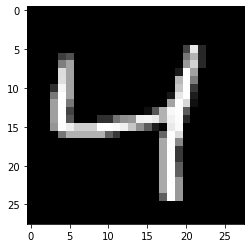

In [55]:
plt.imshow(X_train[2].reshape(28,28), cmap = 'gray')

**To reduce saturation of neural network we divide max scale.**

In [56]:
X_train[0].max(), X_test[0].max()

(255.0, 255.0)

In [57]:
X_train /= 255
X_test /= 255

In [58]:
X_train[2].max()

1.0

In [59]:
X_test[2].max()

1.0

**One hot encoding by Keras**

In [60]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

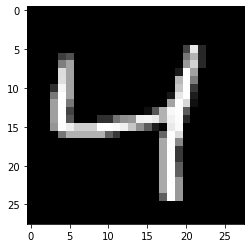

In [61]:
plt.imshow(X_train[2].reshape(28,28), cmap = 'gray')
y_train[2]

In [62]:
y_train.shape

(60000, 10)

**Step1: Build model**

In [63]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

**Step2: Complie model**


In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Step3: Train model**

In [65]:
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test,y_test))

Epoch 1/15
469/469 [==============================] - 141s 300ms/step - loss: 0.2399 - accuracy: 0.9266 - val_loss: 0.0568 - val_accuracy: 0.9823
Epoch 2/15
469/469 [==============================] - 140s 298ms/step - loss: 0.0850 - accuracy: 0.9754 - val_loss: 0.0370 - val_accuracy: 0.9869
Epoch 3/15
469/469 [==============================] - 140s 299ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0339 - val_accuracy: 0.9898
Epoch 4/15
469/469 [==============================] - 141s 301ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0303 - val_accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 140s 298ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0318 - val_accuracy: 0.9905
Epoch 6/15
469/469 [==============================] - 139s 297ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0286 - val_accuracy: 0.9914
Epoch 7/15
469/469 [==============================] - 140s 298ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0291 -

**Step4: Evaluate model**

In [66]:
pred = model.evaluate(X_test, y_test)
print('\nLoss = ' + str(pred[0]))
print('Test Accuracy = ' + str(pred[1]))

313/313 [==============================] - 7s 21ms/step - loss: 0.0297 - accuracy: 0.9925

Loss = 0.029652617871761322
Test Accuracy = 0.9925000071525574
